In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Import clean data**

In [19]:
#orders.csv
url = "https://drive.google.com/file/d/1oUPLIXix1_KydR-QzbDk93WJ6Y5igTt1/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
new_orders = pd.read_csv(path)

# orderlines.csv
url = "https://drive.google.com/file/d/1lRpXgyafQsO_eEcF9RyHVPD5gqMMHSNl/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
new_orderlines = pd.read_csv(path)

# products.csv
url = "https://drive.google.com/file/d/1l5HD9d6btEQf993qLX3xw33qYqeVuHH-/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
new_products = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1joMOpfUpO32ogBWmwBZ2Vj-gYps03sw9/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
new_brands = pd.read_csv(path)

In [20]:
new_products

,sku,name,desc,price,in_stock,type,category,long
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,Apple Accesories,Rain Design
1,RAI0014,Rain Design iSlider iPad Support,Anodized aluminum support multiposition iPad a...,49.99,0,1216,Apple Accesories,Rain Design
2,RAI0015,Rain Design MTower support MacBook Air / Pro,Aluminum support for MacBook Pro and MacBook Air,59.99,1,8696,Apple Accesories,Rain Design
3,RAI0016,Rain Design iLevel2 MacBook Support,Adjustable aluminum bracket height compatible ...,84.99,1,8696,Apple Accesories,Rain Design
4,RAI0018,"Rain Design Mbase Support for iMac 27 """,Minimalist support lifting drawer iMac 27,84.99,1,8696,Apple Accesories,Rain Design
...,...,...,...,...,...,...,...,...
10263,RYV0009,Ryval Base Magnetic Qi Wireless Charging Office,Wireless charging base Ryval magnetic and Qi t...,49.99,0,5399,Apple Accesories,Ryval
10264,RYV0010,Ryval magnetic Qi Wireless Car Charger,Ryval magnetic car charger and Qi Wireless tec...,49.99,0,5399,Apple Accesories,Ryval
10265,MTF0008,Mistify Clean Screens Natural 500ml.,Spray cleaning screens and keyboards.,14.99,1,12085400,Apple Accesories,Mistify
10266,SDE0007,SDesign iPhone charging dock QI X / 8 / Apple ...,Base load compatible with iPhone and Apple Wat...,69.99,0,5399,Apple Accesories,SDesign


In [21]:
new_orderlines

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
3,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99
4,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
...,...,...,...,...,...,...,...,...
60340,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99
60341,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
60342,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
60343,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


In [31]:
new_orders

,order_id,created_date,total_paid,state,its_time
0,241423,2017-11-06 13:10:02,136.15,Completed,High Season
1,242832,2017-12-31 17:40:03,15.76,Completed,High Season
2,243330,2017-02-16 10:59:38,84.98,Completed,Low Season
3,245275,2017-06-28 11:35:37,149.00,Completed,Low Season
4,245595,2017-01-21 12:52:47,112.97,Completed,High Season
...,...,...,...,...,...
45513,527042,2018-03-14 11:47:50,18.98,Completed,Low Season
45514,527070,2018-03-14 11:50:48,24.97,Completed,Low Season
45515,527074,2018-03-14 11:51:42,24.97,Completed,Low Season
45516,527096,2018-03-14 11:58:40,34.96,Completed,Low Season


**Merge some tables**

In [22]:
prod_ordlins = new_products.merge(new_orderlines,on='sku',how='inner')
prod_ordlins['discount'] = prod_ordlins['price'] - prod_ordlins['unit_price']

prod_ordlins['is_discounted']= ''
prod_ordlins['date'] = pd.to_datetime(prod_ordlins['date'])
prod_ordlins.loc[prod_ordlins['discount'] > 0,'is_discounted']= 'Discount Price'
prod_ordlins.loc[prod_ordlins['discount'] <= 0,'is_discounted']= 'Normal Price'
prod_ordlins['date'] = prod_ordlins['date'].dt.date
prod_ordlins['date'] = pd.to_datetime(prod_ordlins['date'])
prod_ordlins['year_quarter'] = prod_ordlins['date'].dt.to_period('Q')
dc_price_over_time = prod_ordlins.groupby(['date','is_discounted'], as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False)


In [23]:
promo_price = prod_ordlins.loc[prod_ordlins['discount'] >0, :]
not_promo_price = prod_ordlins.loc[prod_ordlins['discount'] <=0, :]

In [24]:
new_orderlines['date'] = pd.to_datetime(new_orderlines['date'])
new_orders['created_date'] = pd.to_datetime(new_orders['created_date'])



In [25]:
orderlines_by_month = new_orderlines.groupby(pd.Grouper(key='date', freq='M'))['product_quantity'].sum().sort_values()
orderlines_by_month.index = orderlines_by_month.index.strftime('%B %Y')
#group orders(orders) by month
orders_by_month = new_orders.groupby([pd.Grouper(key='created_date', freq='M')])['total_paid'].sum().sort_values()
orders_by_month.index = orders_by_month.index.strftime('%B %Y')

<ipython-input-25-8257a2550c34>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orderlines_by_month = new_orderlines.groupby(pd.Grouper(key='date', freq='M'))['product_quantity'].sum().sort_values()
<ipython-input-25-8257a2550c34>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_by_month = new_orders.groupby([pd.Grouper(key='created_date', freq='M')])['total_paid'].sum().sort_values()


In [26]:
orders_by_quarter = prod_ordlins.groupby(['year_quarter'], as_index=False)['id_order'].nunique()
revenue_by_quarter = prod_ordlins.groupby(['year_quarter'], as_index=False)['total_price'].sum()

In [27]:
prod_disc = prod_ordlins.groupby('is_discounted', as_index=False)['sku'].nunique()
dc_price_over_time.rename(columns={"is_discounted": "Price Type"}, inplace=True)

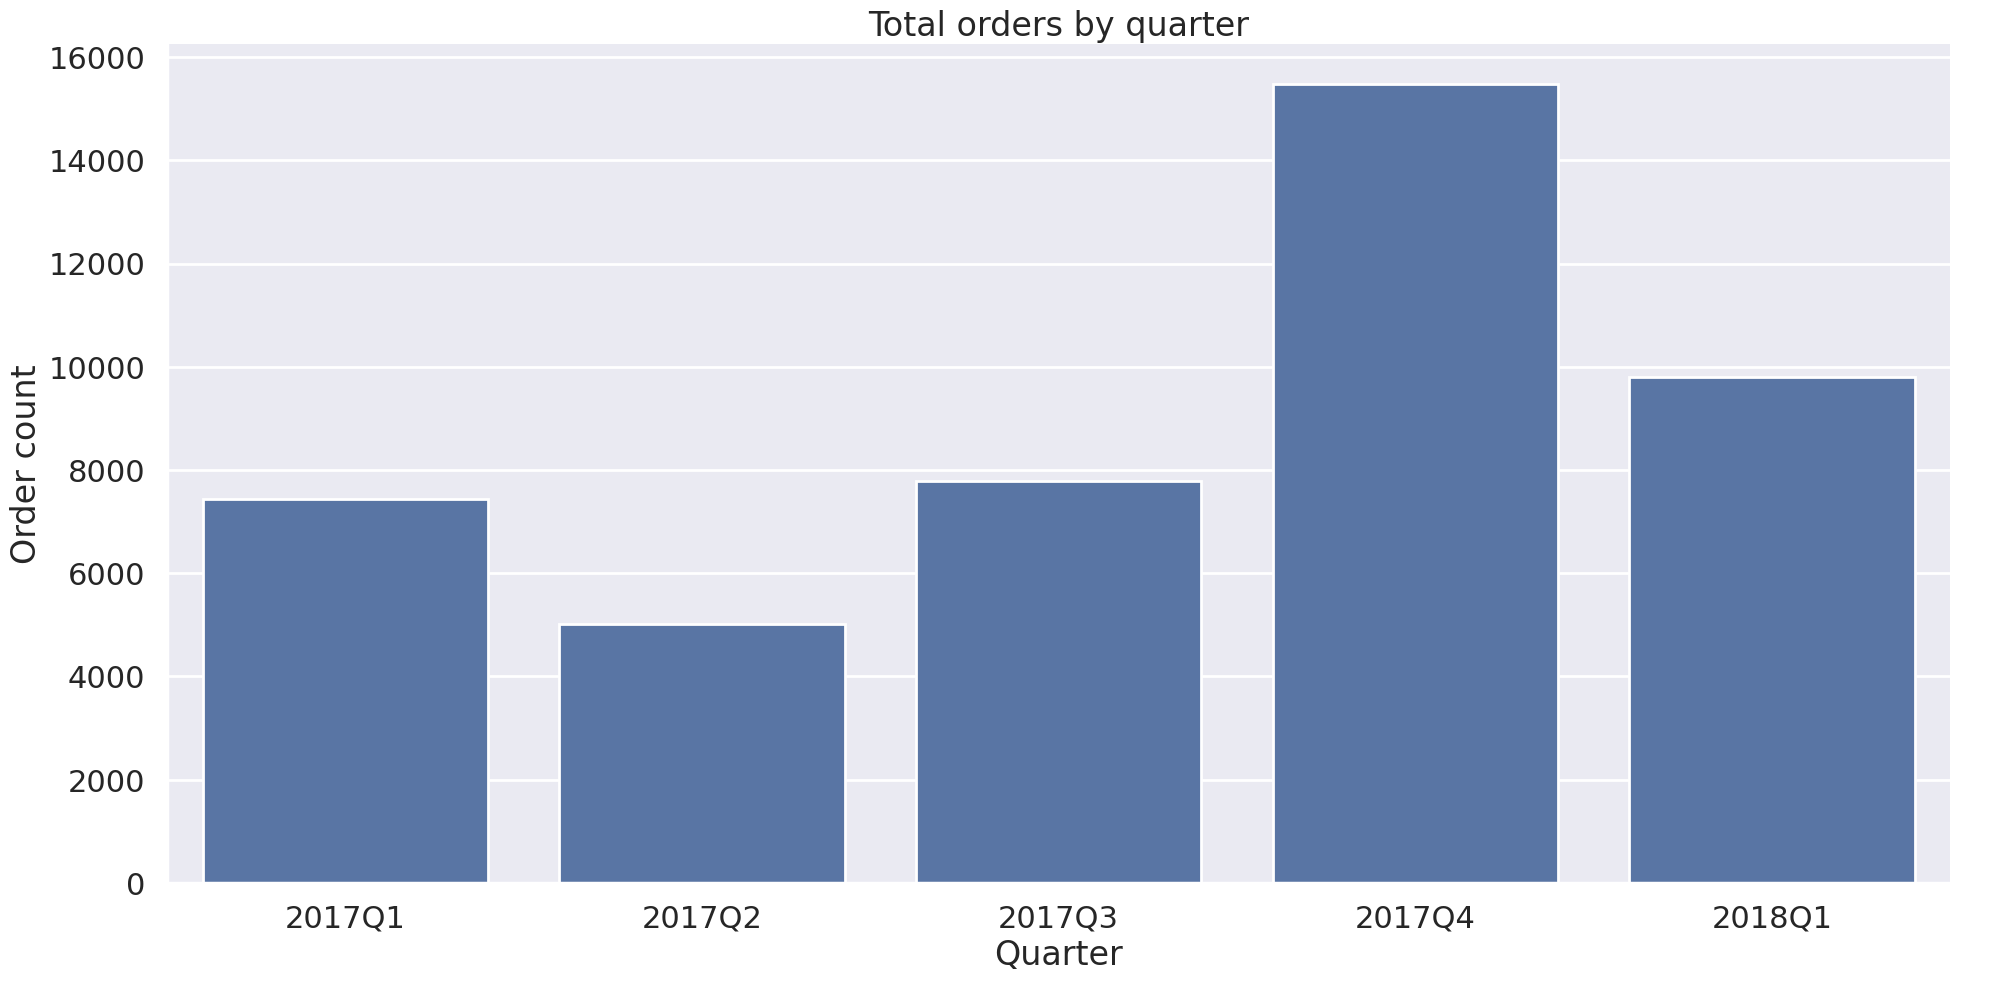

In [41]:
sns.set_theme(style="darkgrid")
sns.set_context("poster")
(
sns.catplot(data=orders_by_quarter,
            x="year_quarter",
            y="id_order",
            kind="bar",
            height=10,
            aspect=2,
            color='#4c72b0')
  .set_axis_labels("Quarter",
                     "Order count")
  .set(title="Total orders by quarter")

)

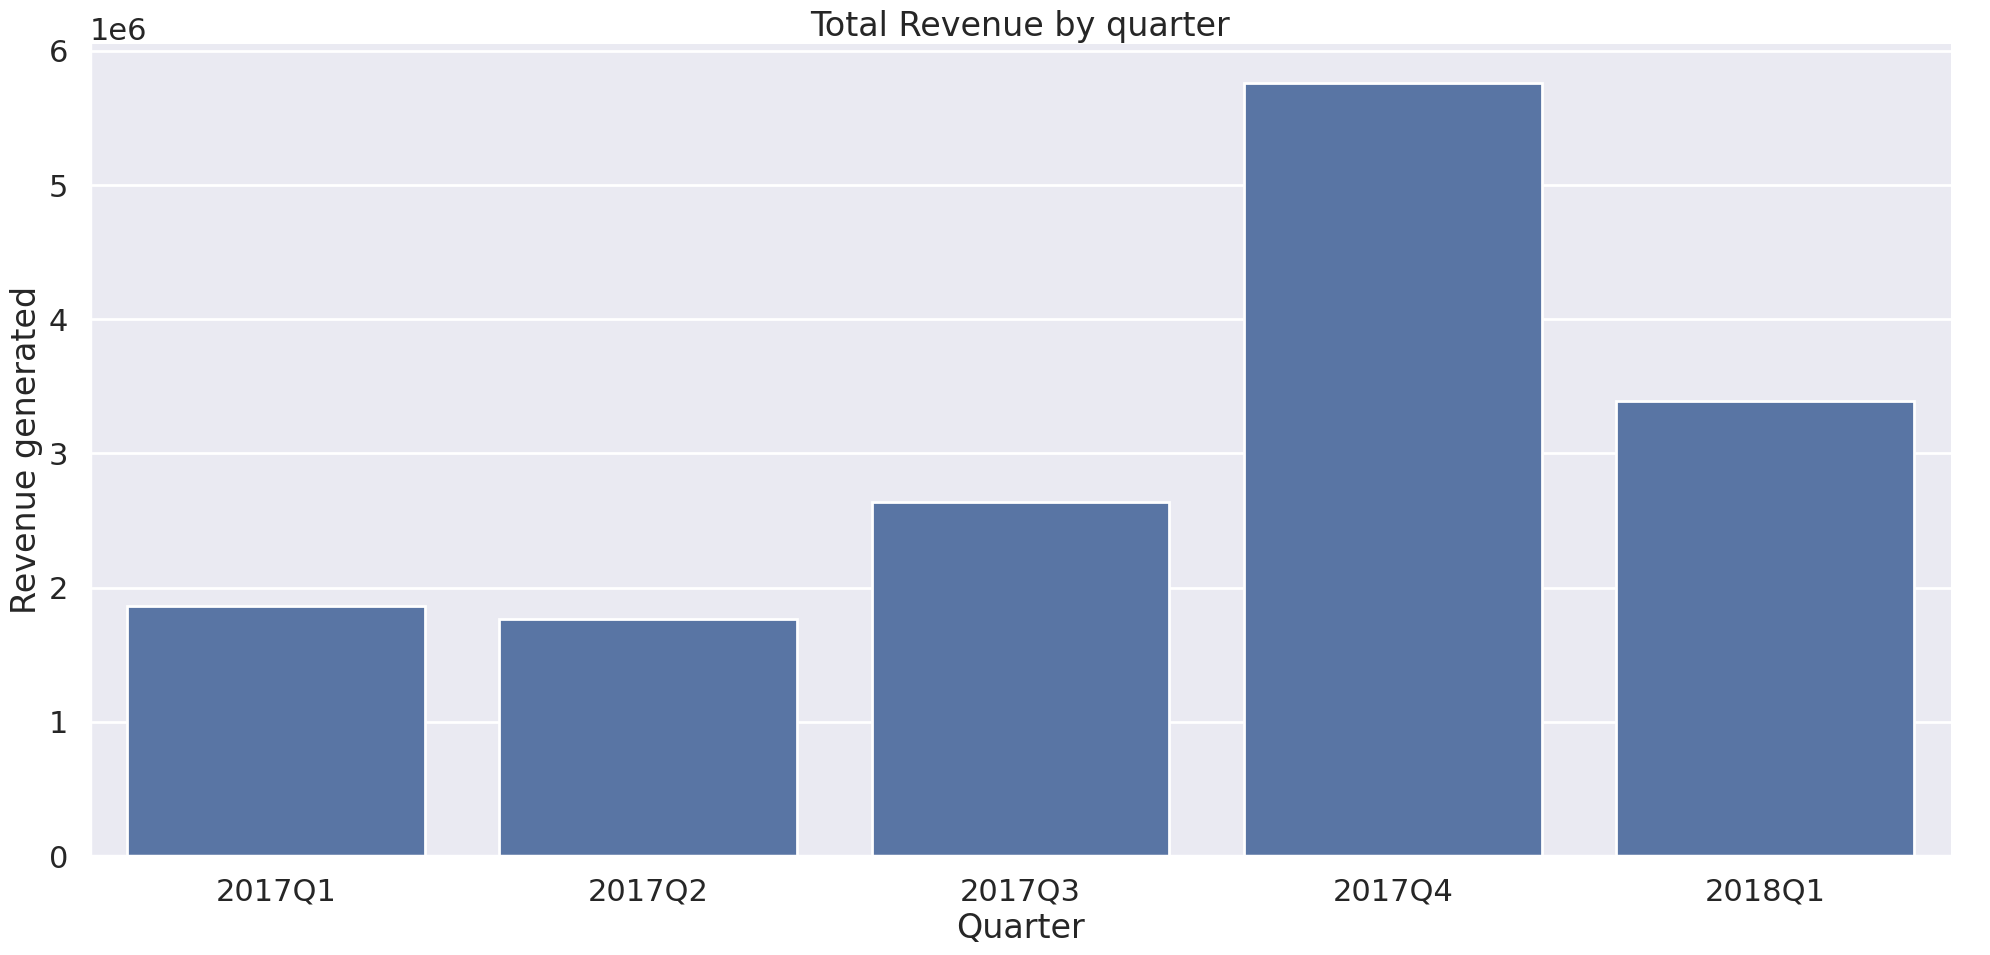

In [42]:
(
sns.catplot(data=revenue_by_quarter,
            x="year_quarter",
            y="total_price",
            kind="bar",
            height=10,
            aspect=2,
            color='#4c72b0')
  .set_axis_labels("Quarter",
                     "Revenue generated")
  .set(title="Total Revenue by quarter")

)

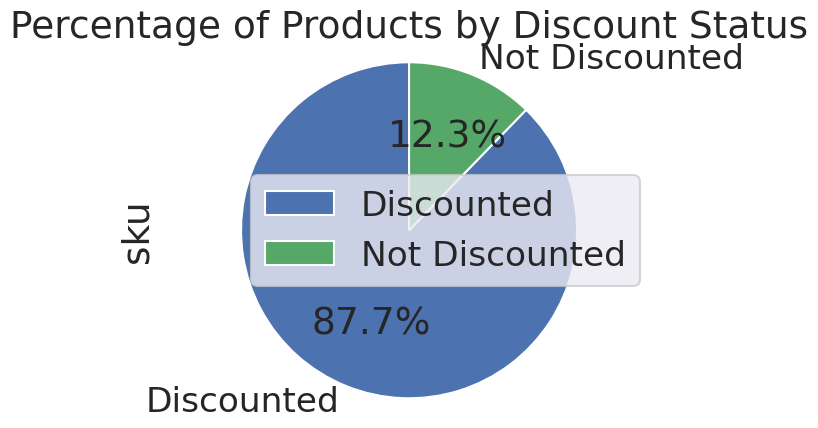

In [44]:

prod_disc.plot.pie(
    y='sku',
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Start angle for the pie chart
    colors=['#4c72b0', '#55a868'],  # Custom colors
    labels=['Discounted', 'Not Discounted'],  # Custom labels
    legend=True         # Display legend
)
plt.title('Percentage of Products by Discount Status')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the plot



# Define an Apple-like color palette
apple_palette = ["#1D1D1F", "#0071E3", "#A2AAAD"]

<ipython-input-46-b6026f1554a3>:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.relplot(


Text(0.5, 1.0, 'Daily revenue from discount and non-discount price')

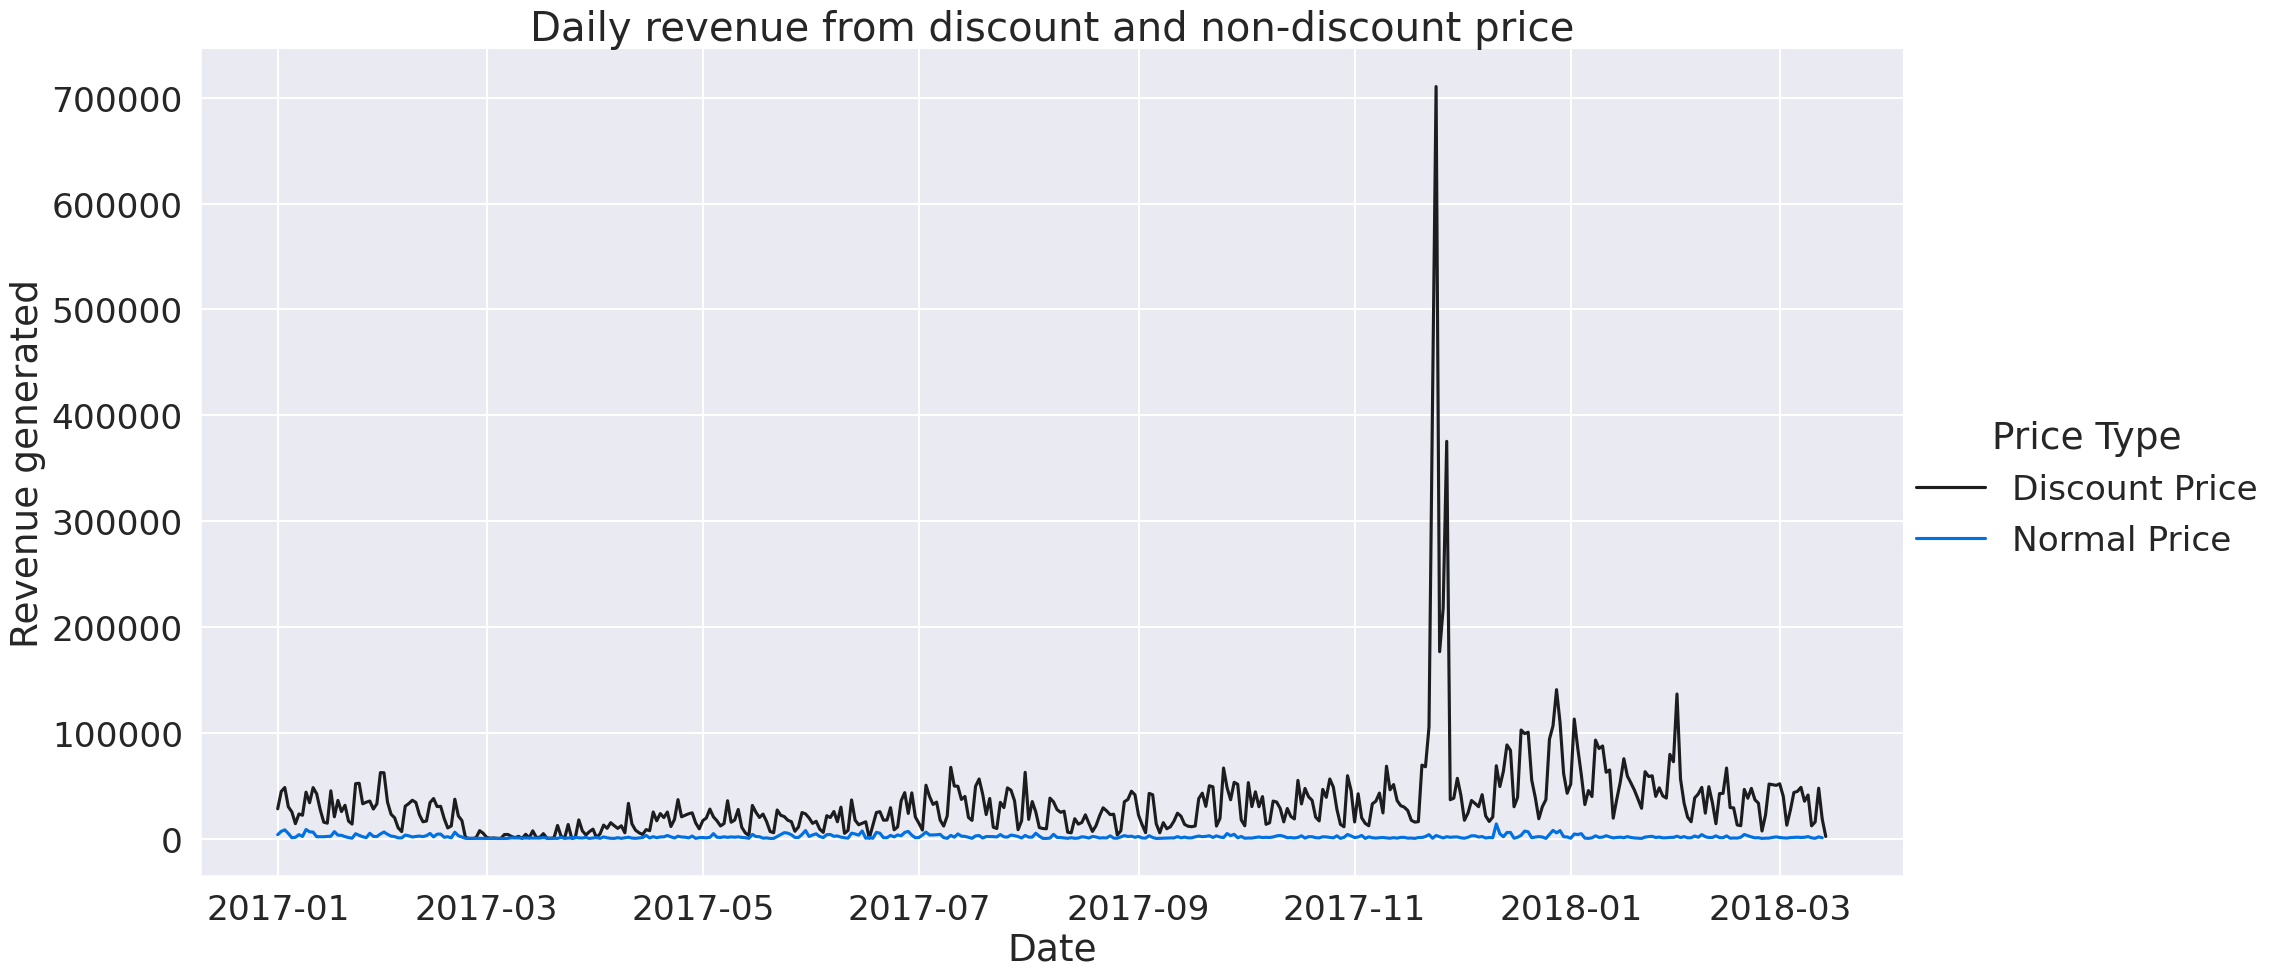

In [46]:




# Set the style to be more minimalist, resembling Apple's aesthetic
sns.set_theme(style="darkgrid")
sns.set_context("talk", font_scale=1.5)  # Adjust font size

# Create the plot
plot = sns.relplot(
    data=dc_price_over_time,
    x="date",
    y="total_price",
    hue="Price Type",
    kind="line",
    height=10,
    aspect=2,
    palette=apple_palette
)

# Customize the axis labels and title
plot.set_axis_labels("Date", "Revenue generated")
plot.set(title="Daily revenue from discount and non-discount price")

# Adjust the title size
plot.ax.set_title("Daily revenue from discount and non-discount price", fontsize=29)


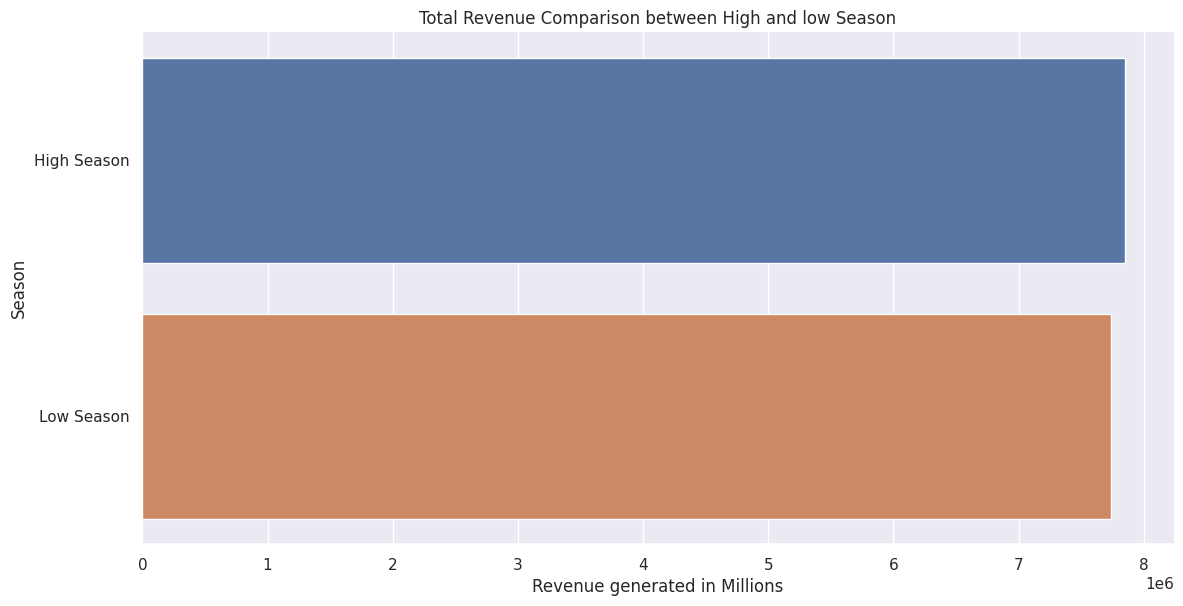

In [40]:
orders_by_holiday = new_orders.groupby('its_time',as_index=False)['total_paid'].sum().sort_values(by='total_paid',ascending=False)
sns.set_theme(style="darkgrid")
(
sns.catplot(data=orders_by_holiday,kind='bar',y='its_time',x='total_paid',height=6, aspect = 2, hue='its_time')
 .set_axis_labels("Revenue generated in Millions",
                  "Season"
                    )
 .set(title="Total Revenue Comparison between High and low Season")
)